In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.model_selection import train_test_split as TTS
import sklearn.metrics as metrics
from sklearn.tree import plot_tree

In [20]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
pima = pd.read_csv('diabetes.csv', header=None, names=col_names)

#DUARTE
# file_name = filedialog.askopenfilename()
# if file_name is not None:
#   pima = pd.read_csv(file_name, header = None, names = col_names)
#pima = pima.drop(pima.index[[0]])

In [21]:
pima = pima.drop(pima.index[[0]])
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


In [22]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [23]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = TTS(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [24]:
# Create Decision Tree classifer object
clf = DTC(max_depth=5)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [25]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7748917748917749


In [26]:
#Plot_Tree

from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_jpg('diabetes.jpg')


True

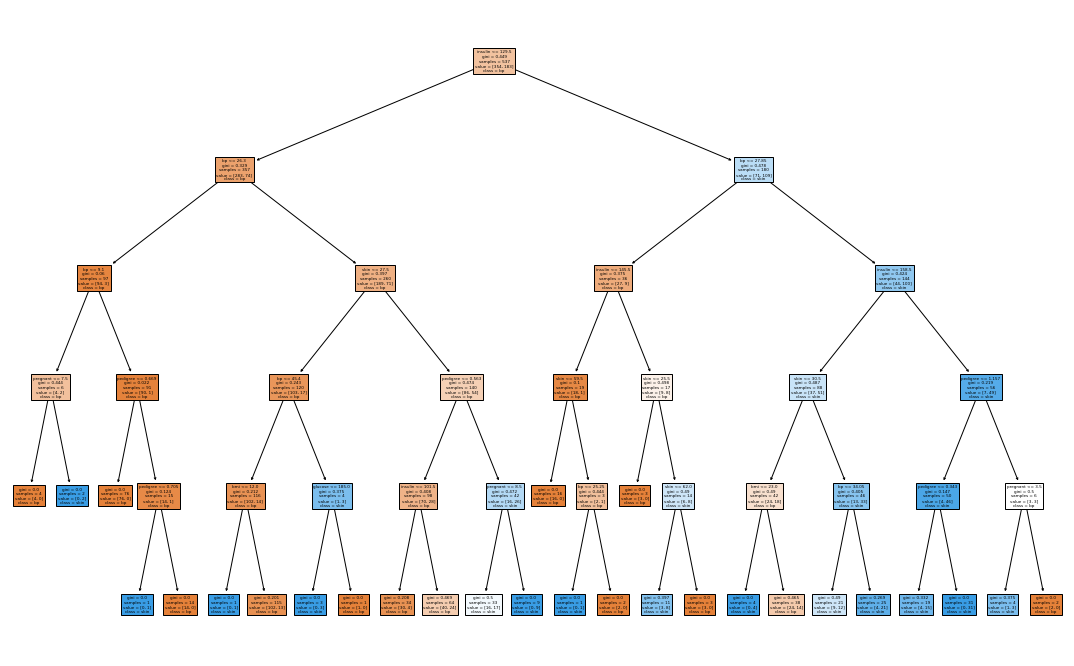

In [34]:
#Visualize Decision Tree

plt.figure(figsize=(19,12))
features = pima.columns
classes = ['bp', 'skin', 'insulin', 'bmi']
plot_tree(clf,feature_names=features, class_names=classes, filled=True)
plt.savefig('diabetes_r01.pdf', dpi = 'figure', format = 'pdf')
plt.show()